In [ ]:
# ! pip install scrublet

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
import scipy 

In [3]:
adata = sc.read_h5ad('calu3.h5ad')

In [4]:
adata.var_names_make_unique()

In [5]:
adata.obs['cell_type'].unique()

['cultured cell']
Categories (1, object): ['cultured cell']

In [6]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,infect,strain,nCount_Unspliced,nFeature_Unspliced,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,donor_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
Calu3-S1-12h-A_AAAACGAAGCTG,Calu3-S1-12h-A,1399.0,1001,infected,SARSCoV1,1176.0,861,1001,6.909753,2265.772705,...,Calu-3,cell,cultured cell,Drop-seq,severe acute respiratory syndrome,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown
Calu3-S1-12h-A_AAAACGTGTGTT,Calu3-S1-12h-A,2580.0,1425,infected,SARSCoV1,2082.0,1216,1425,7.262629,2597.423340,...,Calu-3,cell,cultured cell,Drop-seq,severe acute respiratory syndrome,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown


In [7]:
adata.var.head(2)

,feature_is_filtered,feature_name,feature_reference,feature_biotype
feature_id,,,,
ENSG00000146038,False,DCDC2,NCBITaxon:9606,gene
ENSG00000136536,False,MARCHF7,NCBITaxon:9606,gene


## select s2 only

In [8]:
adata = adata[adata.obs["strain"] != "SARSCoV1"]
adata = adata[adata.obs.query("strain != 'SARSCoV1'").index]
adata = adata[[r != "SARSCoV1" for r in adata.obs.strain]]
adata.obs.strain.unique()

['nan', 'SARSCoV2']
Categories (2, object): ['SARSCoV2', 'nan']

In [9]:
conditions = []
for i in range(len(adata.obs.index)):
    conditions.append(adata.obs.index[i].split('-')[1:3])
set(tuple(row) for row in conditions)

{('S2', '12h'), ('S2', '4h'), ('S2', '8h'), ('mock', '12h'), ('mock', '4h')}

## retrieve raw counts

In [10]:
adata.X = adata.raw.X 

## create count matrix

In [11]:
#genes = list(adata.var['feature_name'].values)
#counts = adata[:, adata.var['feature_name'].isin(genes)].to_df() 

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


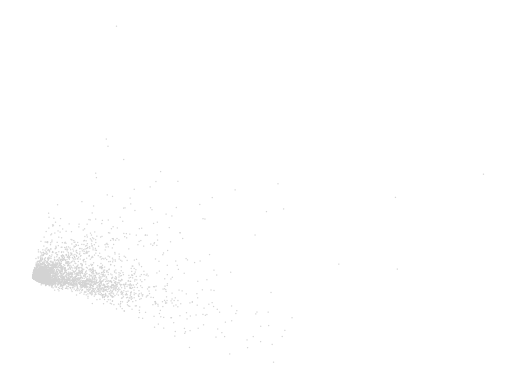

In [12]:
sc.tl.pca(adata) 
sc.pl.pca(adata, frameon=False)

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/s

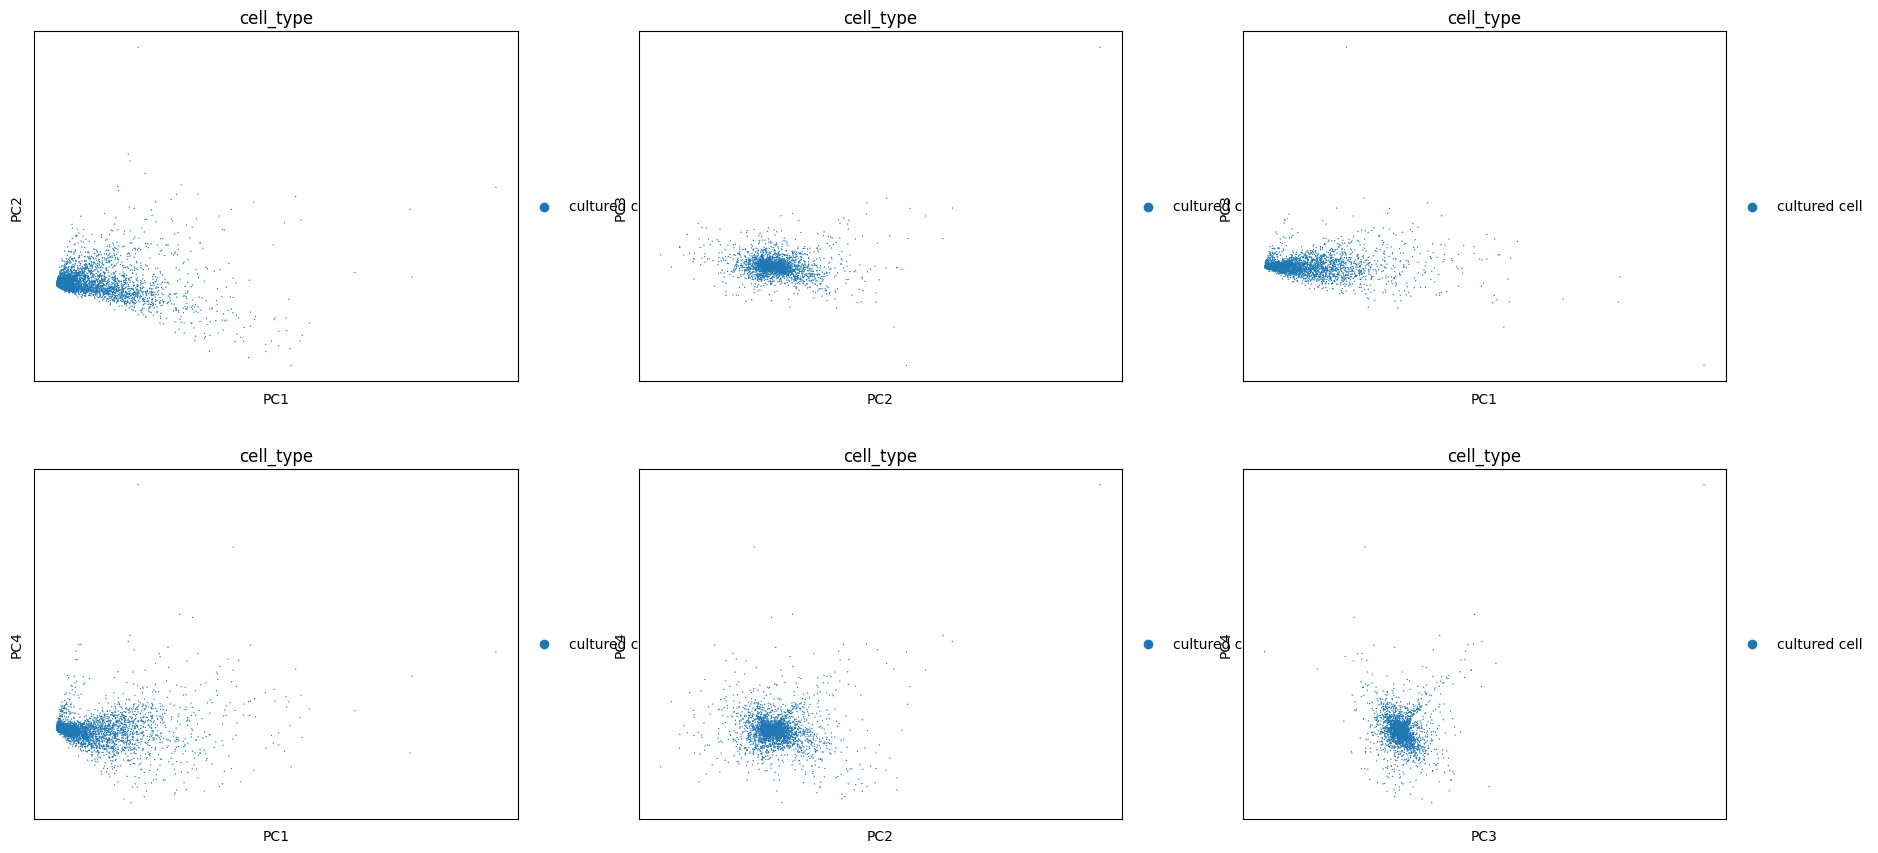

In [13]:
sc.pl.pca(adata, color=["cell_type"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

In [19]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,infect,strain,nCount_Unspliced,nFeature_Unspliced,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,donor_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
Calu3-mock-12h-A_AAAAATCCCTAG,Calu3-mock-12h-A,1467.0,1050,uninf,nan,1269.0,931,1050,6.957497,2334.701416,...,Calu-3,cell,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown
Calu3-mock-12h-A_AAAACATACTTA,Calu3-mock-12h-A,1905.0,1271,uninf,nan,1592.0,1117,1271,7.148346,2568.509033,...,Calu-3,cell,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

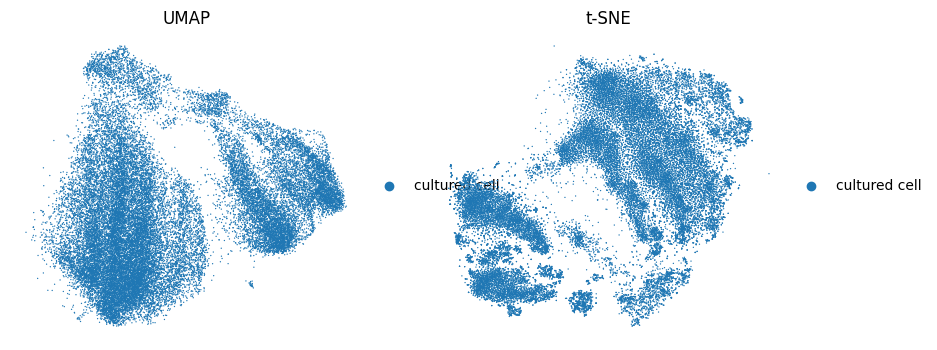

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
sc.pl.umap(adata, frameon=False, ax=axs[0], color=["cell_type"], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata, frameon=False, ax=axs[1], color=["cell_type"], title="t-SNE", show=False) # Отрисовываем t-SNE

In [36]:
adata.obs['condition'] = adata.obs.index.str.split('-').str[1]
adata.obs['hpi'] = adata.obs.index.map(lambda x: x.split('-')[2].strip().replace("h","") if len(x.split('-'))>1 else None)

In [37]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,infect,strain,nCount_Unspliced,nFeature_Unspliced,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,condition,hpi
Calu3-mock-12h-A_AAAAATCCCTAG,Calu3-mock-12h-A,1467.0,1050,uninf,nan,1269.0,931,1050,6.957497,2334.701416,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACATACTTA,Calu3-mock-12h-A,1905.0,1271,uninf,nan,1592.0,1117,1271,7.148346,2568.509033,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACATGTCAA,Calu3-mock-12h-A,2156.0,1403,uninf,nan,1808.0,1239,1403,7.247081,2725.995361,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACCAGACTA,Calu3-mock-12h-A,3418.0,2063,uninf,nan,2507.0,1650,2063,7.632401,3297.717041,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
Calu3-mock-12h-A_AAAACTCTAGCG,Calu3-mock-12h-A,2311.0,1378,uninf,nan,1889.0,1210,1378,7.229114,2618.069824,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Calu3-mock-4h-B_TTTTCGTTTGTG,Calu3-mock-4h-B,3873.0,1901,infected,nan,3108.0,1671,1901,7.550661,3033.565186,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4
Calu3-mock-4h-B_TTTTGGAATGGT,Calu3-mock-4h-B,54939.0,7926,infected,nan,15378.0,4863,7926,8.978030,4629.885254,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4
Calu3-mock-4h-B_TTTTGGCACGAC,Calu3-mock-4h-B,41645.0,7619,infected,nan,14697.0,5007,7619,8.938532,4656.414062,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4
Calu3-mock-4h-B_TTTTTGCGATAA,Calu3-mock-4h-B,2291.0,1322,infected,nan,1891.0,1177,1322,7.187657,2588.040527,...,cultured cell,Drop-seq,normal,Homo sapiens,male,epithelial cell of lung (cell culture),unknown,unknown,mock,4


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

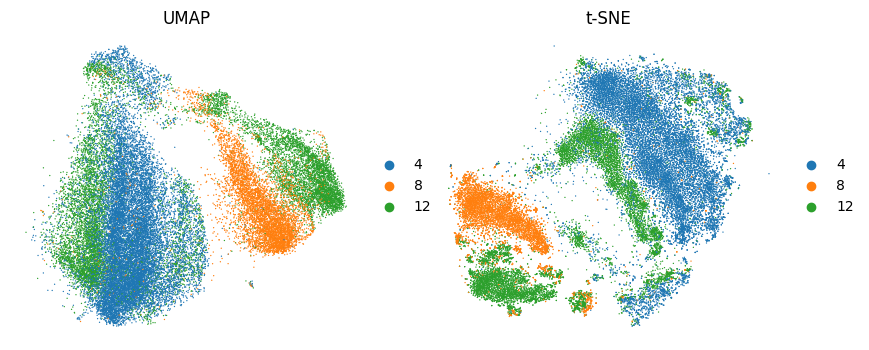

In [39]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
sc.pl.umap(adata, frameon=False, ax=axs[0], color=["hpi"], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata, frameon=False, ax=axs[1], color=["hpi"], title="t-SNE", show=False) # Отрисовываем t-SNE


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 't-SNE'}, xlabel='tSNE1', ylabel='tSNE2'>

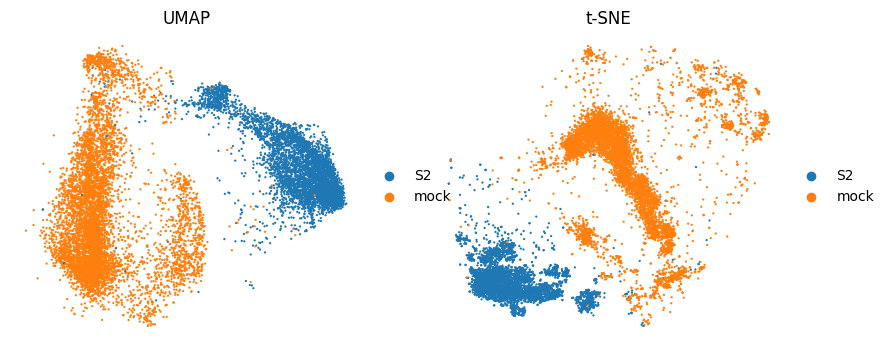

In [58]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

sc.pl.umap(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[0], color=["condition"], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[1], color=["condition"], title="t-SNE", show=False) # Отрисовываем t-SNE

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/s

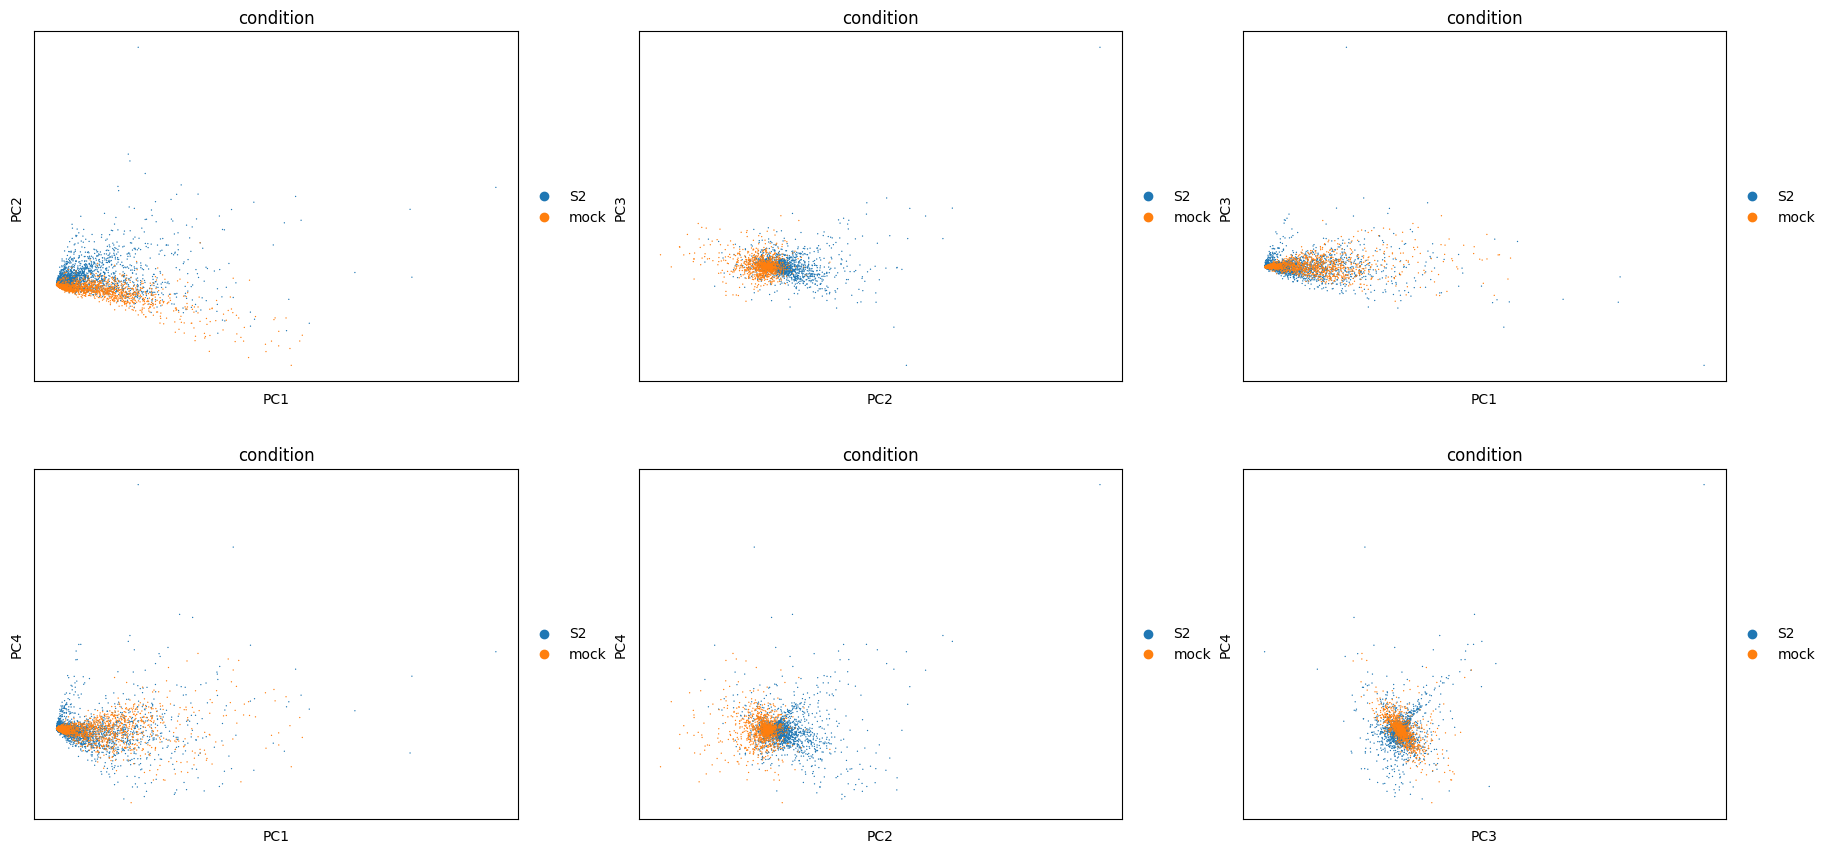

In [41]:
sc.pl.pca(adata, color=["condition"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/s

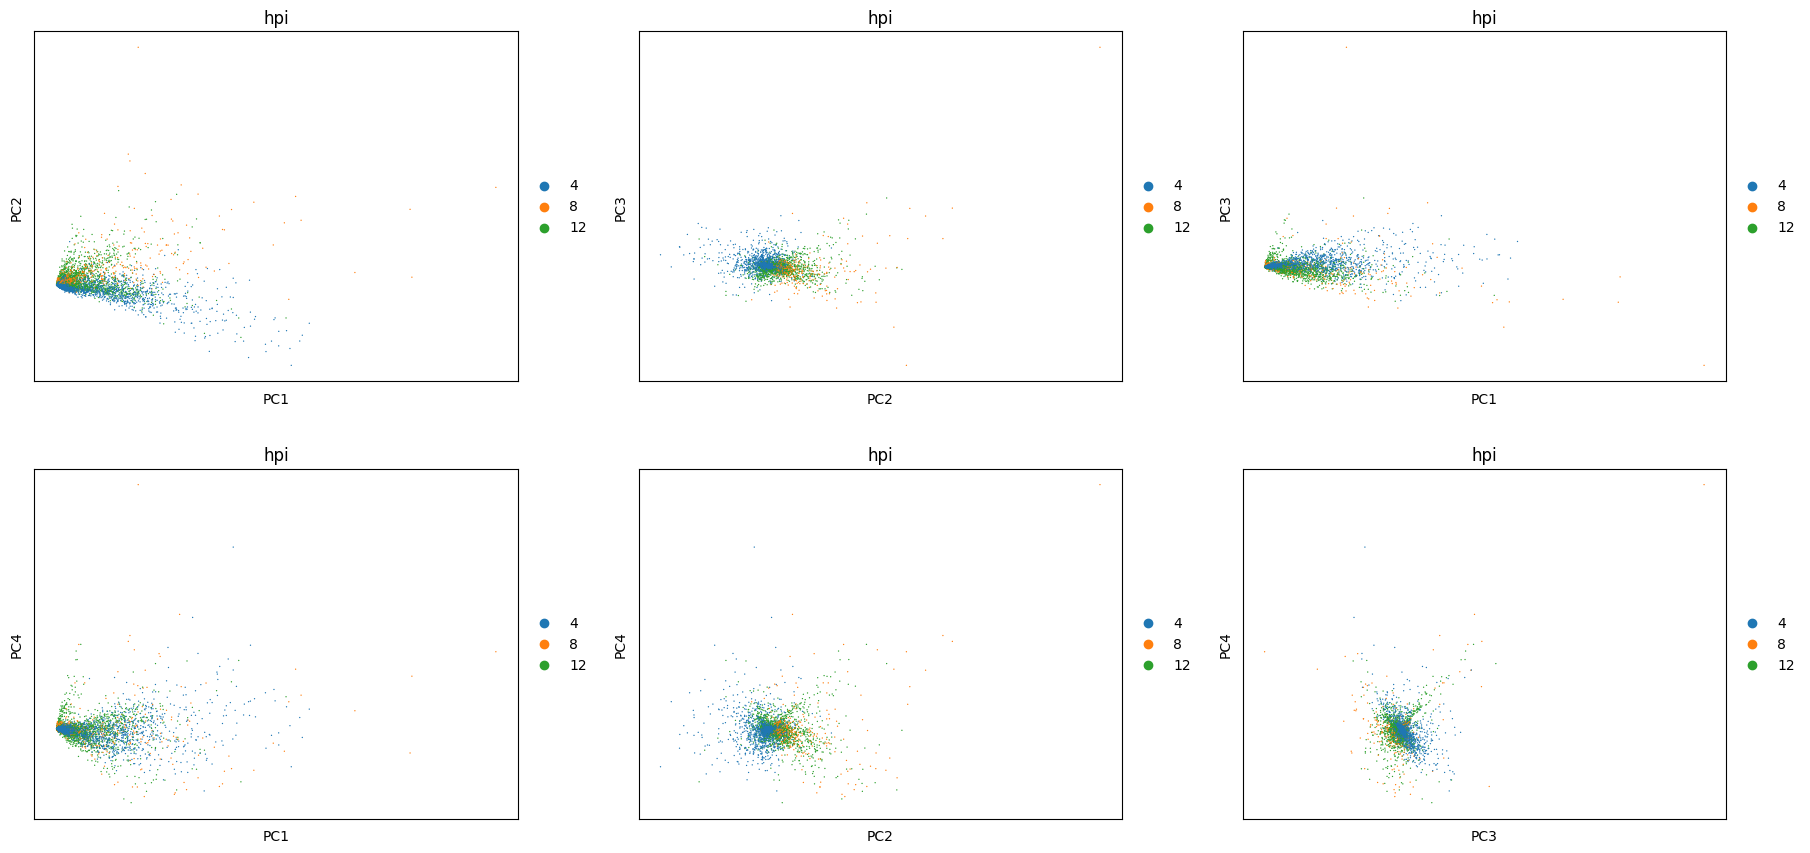

In [42]:
sc.pl.pca(adata, color=["hpi"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/s

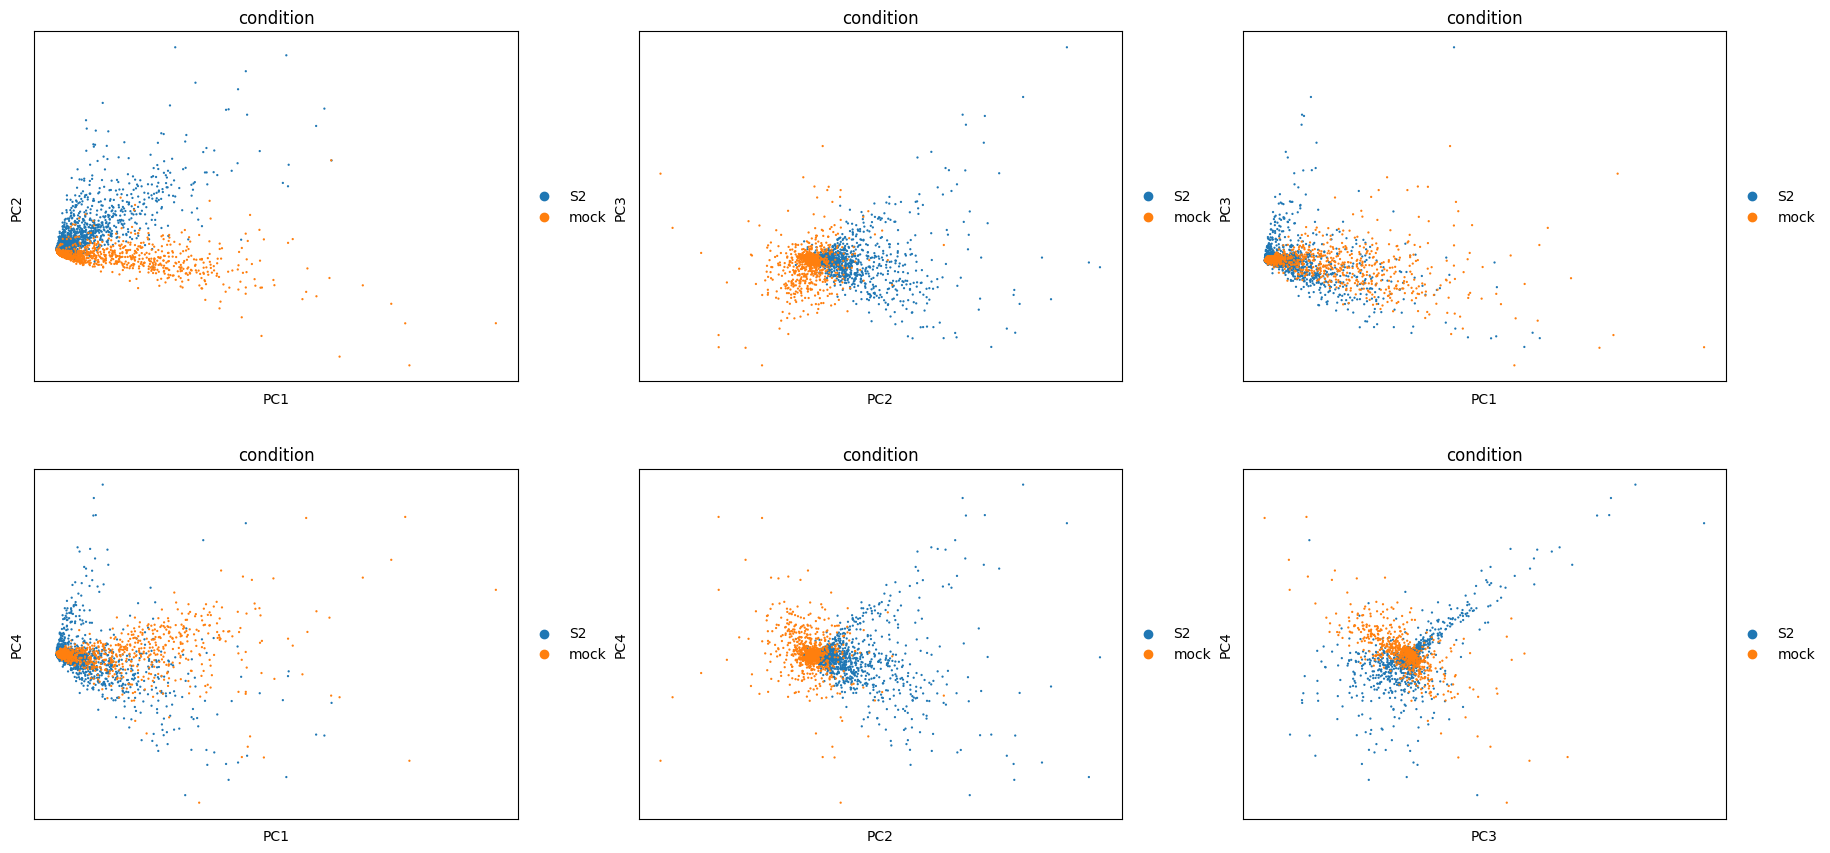

In [60]:
sc.pl.pca(adata[adata.obs['hpi'] == '12'], color=["condition"], components = ['1,2','2,3','1,3','1,4','2,4','3,4'], ncols=3)

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/s

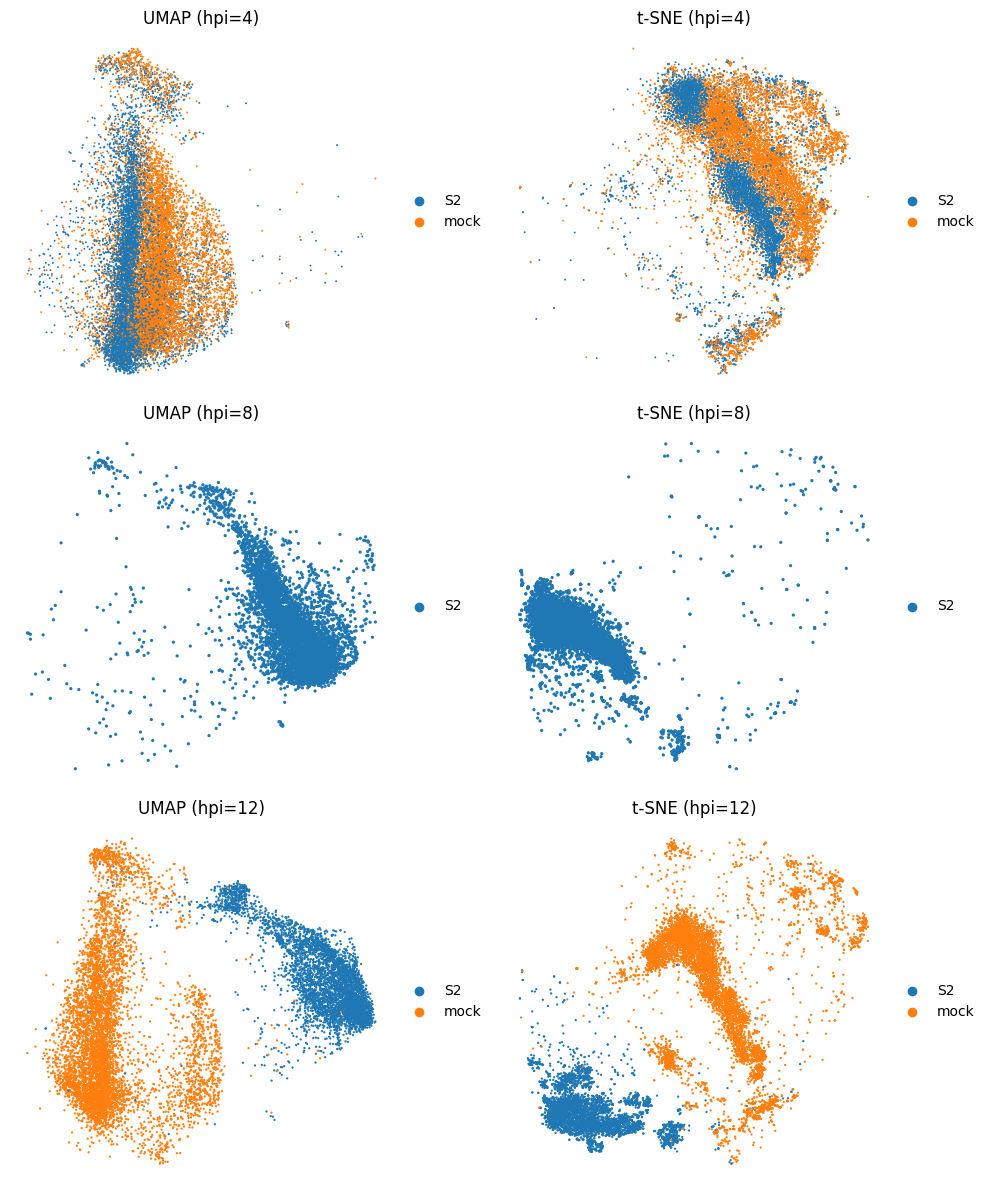

In [59]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 12))

sc.pl.umap(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 0], color=["condition"], title="UMAP (hpi=4)", show=False) 
sc.pl.tsne(adata[adata.obs['hpi'] == '4'], frameon=False, ax=axs[0, 1], color=["condition"], title="t-SNE (hpi=4)", show=False)

sc.pl.umap(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 0], color=["condition"], title="UMAP (hpi=8)", show=False)
sc.pl.tsne(adata[adata.obs['hpi'] == '8'], frameon=False, ax=axs[1, 1], color=["condition"], title="t-SNE (hpi=8)", show=False)

sc.pl.umap(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 0], color=["condition"], title="UMAP (hpi=12)", show=False) 
sc.pl.tsne(adata[adata.obs['hpi'] == '12'], frameon=False, ax=axs[2, 1], color=["condition"], title="t-SNE (hpi=12)", show=False)

plt.tight_layout()
plt.show()


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


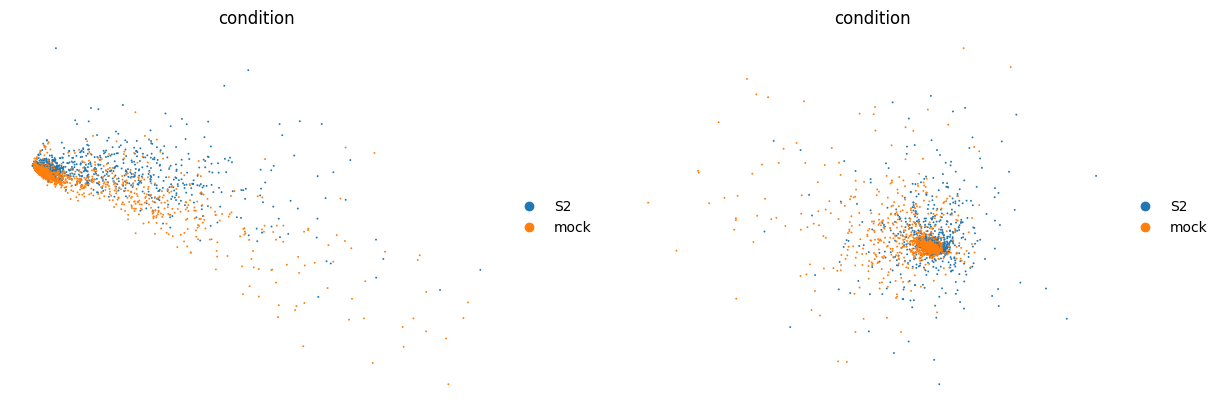

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


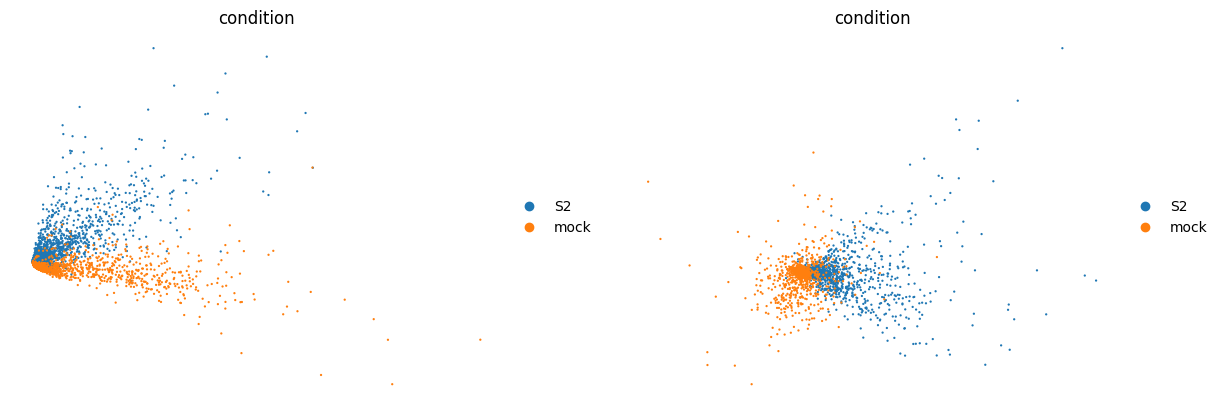

In [103]:
sc.pl.pca(adata[adata.obs['hpi'] == '4'], color=["condition"], frameon=False, components = ['1,2','2,3'], ncols=2)
sc.pl.pca(adata[adata.obs['hpi'] == '12'], color=["condition"], frameon=False, components = ['1,2','2,3'], ncols=2)

ValueError: Cannot specify `ax` when plotting multiple panels (each for a given value of 'color').

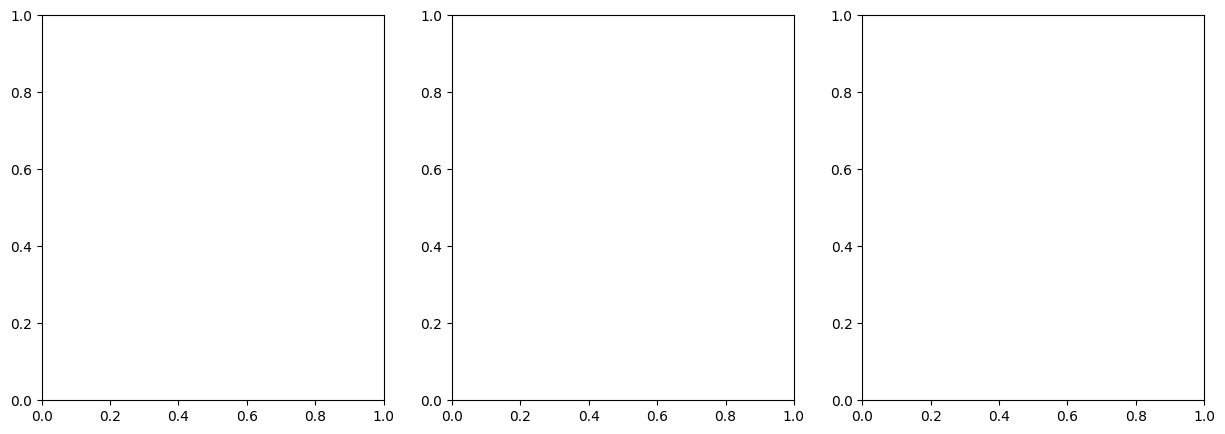

In [104]:
import scanpy as sc
import matplotlib.pyplot as plt

# define the figure and axes objects
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# plot the first subplot
sc.pl.pca(adata[adata.obs['hpi'] == '4'], color=["condition"], frameon=False, components = ['1,2','2,3'], ncols=2, ax=axs[0])
axs[0].set_title("hpi = 4")

# plot the second subplot
sc.pl.pca(adata[adata.obs['hpi'] == '8'], color=["condition"], frameon=False, components = ['1,2','2,3'], ncols=2, ax=axs[1])
axs[1].set_title("hpi = 8")

# plot the third subplot
sc.pl.pca(adata[adata.obs['hpi'] == '12'], color=["condition"], frameon=False, components = ['1,2','2,3'], ncols=2, ax=axs[2])
axs[2].set_title("hpi = 12")

# add a title for the entire plot
fig.suptitle("PCA plot for different hpi values")
